In [2]:
!pip install transformers seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.0 MB/s eta 0:00:00


In [3]:
import torch
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
import seaborn as sns

# Load tokenizer and model
model_name = 'sentence-transformers/paraphrase-MiniLM-L6-v2'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

# Tokenize input and get attention
sentence = "More cars get sold via digital platforms such as Edmunds."
inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True, max_length=128)
outputs = model(**inputs)
attentions = outputs.attentions

In [4]:
attentions[-1].shape

torch.Size([1, 12, 14, 14])

In [5]:
token_focus = "cars"
token_id = tokenizer.convert_tokens_to_ids(token_focus)
if token_id not in inputs['input_ids'][0]:
    print(f"'{token_focus}' token not found in the sentence.")

idx = (inputs['input_ids'][0] == token_id).nonzero().item()
attention_data = attentions[0][0, :, idx].detach().numpy()
attention_data.shape

(12, 14)

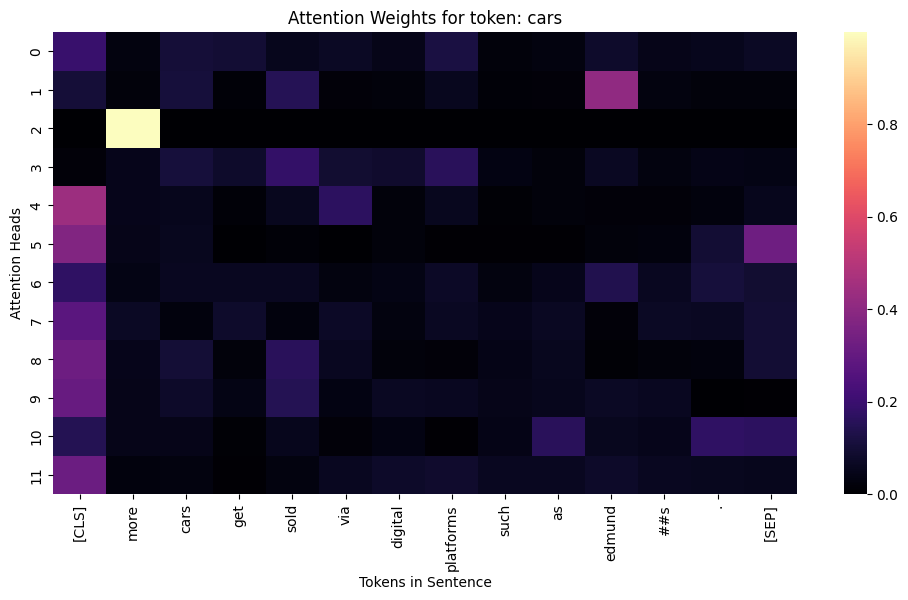

In [6]:
# Visualize attention weights
def plot_attention(attention, sentence, token_focus):
    # Get the attention weights for the token of interest
    token_id = tokenizer.convert_tokens_to_ids(token_focus)
    if token_id not in inputs['input_ids'][0]:
        print(f"'{token_focus}' token not found in the sentence.")
        return

    idx = (inputs['input_ids'][0] == token_id).nonzero().item()
    attention_data = attentions[0][0, :, idx].detach().numpy()

    # Plot
    plt.figure(figsize=(12, 6))
    sns.heatmap(attention_data, xticklabels=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]), cmap='magma')
    plt.title(f'Attention Weights for token: {token_focus}')
    plt.xlabel('Tokens in Sentence')
    plt.ylabel('Attention Heads')
    plt.show()

# Plot attention weights for the "query" token
plot_attention(attentions[-1], sentence,token_focus)